### Descargar imágenes

In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

### Cargar librerías

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 1049.5, 980.5, -0.5)

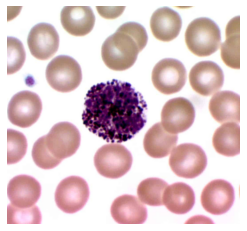

In [3]:
#Leer imagen
im = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/Linfo2.jpg")
#im=cv2.imread('./Imagenes/Linfo2.jpg')
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')

(-0.5, 1049.5, 980.5, -0.5)

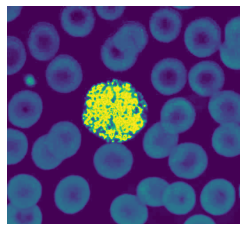

In [4]:
#Cambio de espacio de color (matiz)
imgH=cv2.cvtColor(im,cv2.COLOR_RGB2HSV)
img=imgH[:,:,1]
plt.imshow(img)
plt.axis('off')

(-0.5, 1049.5, 980.5, -0.5)

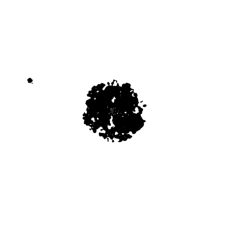

In [5]:
#Umbralización
_,imgB=cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(imgB, cmap='gray')
plt.axis('off')

(-0.5, 1049.5, 980.5, -0.5)

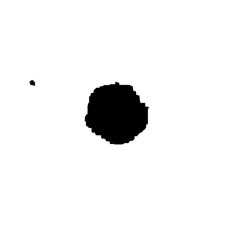

In [6]:
#Filtro morfológico
kernel = np.ones((8,8),np.uint8)
imaB=cv2.morphologyEx(imgB, cv2.MORPH_OPEN, kernel, iterations = 10)
#imaB = cv2.erode(imaB,kernel, iterations = 20)
#imaB = cv2.dilate(imaB,kernel, iterations = 20)
plt.imshow(imaB, cmap='gray')
plt.axis('off')

(-0.5, 1049.5, 980.5, -0.5)

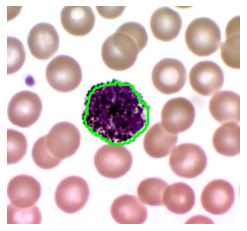

In [9]:
#encontrar contorno
contornos, jerarquia = cv2.findContours(imaB,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#Dibujar los contornos
img2=im.copy()
#cnt=contornos[0]
img2 = cv2.drawContours(img2, contornos, 1, (0,255,0), 10)
plt.imshow(img2)
plt.axis('off')

### Relación de aspecto
Es la razón entre el ancho y la altura del contorno del objeto.$$Razón\,De\,Aspecto=\frac{Ancho}{Altura}$$

In [18]:
cnt = contornos[0]
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
print (aspect_ratio)

1.070336391437309


### Máscara y número de píxeles
En algunos casos es muy útil crear una máscara del objeto de interés. Adicionalmente, puede resultar útil conocer los puntos que conforman el objeto. Ambas operaciones se pueden hacer de la siguiente manera:

(-0.5, 1049.5, 980.5, -0.5)

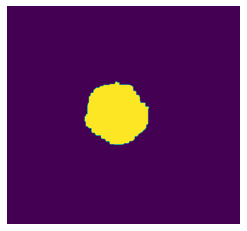

In [19]:
mask = np.zeros(imaB.shape,np.uint8)
cv2.drawContours(mask,contornos,1,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))

plt.imshow(mask)
plt.axis('off')

(-0.5, 1049.5, 980.5, -0.5)

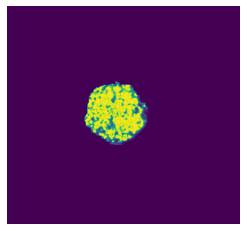

In [20]:
plt.imshow(img*(mask==255))
plt.axis('off')

#### Valores mínimo y máximo y sus respectivas coordenadas

In [21]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img,mask = mask)
print (min_val, max_val, min_loc, max_loc)

0.0 255.0 (441, 433) (474, 351)


#### Color medio o Intensidad media
Aquí podemos encontrar el color medio de un objeto. O puede ser la intensidad media del objeto en modo de escala de grises. De nuevo usamos la misma máscara para hacerlo.

In [22]:
mean_val = cv2.mean(im,mask = mask)
print (mean_val)

(88.66439747003994, 37.62583222370173, 91.23896471371503, 0.0)


#### Puntos extremos
Los puntos extremos son cuatro y se corresponden con: el punto superior, el inferior, el derecho y el izquierdo de la imagen.

In [23]:
izquierdo = tuple(cnt[cnt[:,:,0].argmin()][0])
derecho = tuple(cnt[cnt[:,:,0].argmax()][0])
superior = tuple(cnt[cnt[:,:,1].argmin()][0])
inferior = tuple(cnt[cnt[:,:,1].argmax()][0])
print (izquierdo, derecho, superior, inferior)

(0, 0) (1049, 980) (0, 0) (0, 980)
